In [2]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

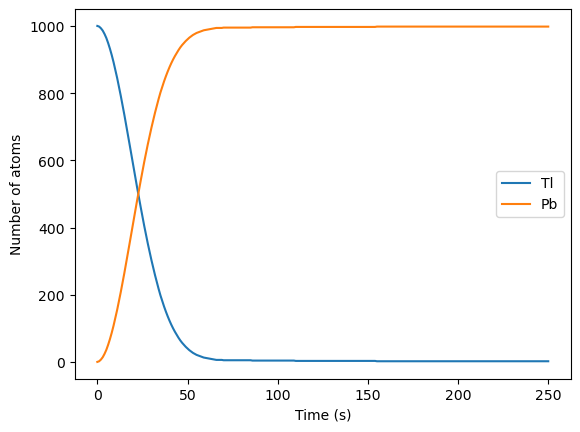

In [3]:
#Inizializing the list of numbers of thallium atoms
n_tl = [1000]

tau = (3.052 * 60) / np.log(2)

#Probability function
def p(t):
    return 1 - 2**((-t) / tau)

#I arbitrarily choose a running time of 250 seconds (~4 minutes)
time = np.linspace(0,250,251)

for t in time[1:]:   #Skipping t=0 since we already inizialize n_tl with 1000
    n_decay = int(n_tl[-1] * p(t))    #We multiply the number of surviving thallium atoms by the probability each one of them will decay...
    n_tl.append(n_tl[-1] - n_decay)   #...and those are the ones that decay, so we subtract this value and update the list

#Creating the number of lead atoms array by subtracting each element of n_tl to the initial number of atoms
n_tl = np.array(n_tl)
n_pb = n_tl[0] - n_tl
    
#Plot
plt.plot(time, n_tl, label = 'Tl')
plt.plot(time, n_pb, label = 'Pb')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

Given

$$p(t)=2^{-\frac{t}{\tau}}\frac{\ln2}{\tau}$$

we have

$$\int_0^{t(z)}p(t')dt'=\frac{\ln2}{\tau}\left(-\frac{\tau}{\ln2}\right)2^{-\frac{t'}{\tau}}\bigg|_0^{t(z)}=1-2^{-\frac{t(z)}{\tau}}$$

So we find:

$$z=1-2^{-\frac{t(z)}{\tau}} \ \iff \ 2^{-\frac{t(z)}{\tau}}=1-z \ \Longrightarrow \ t(z)=-\tau\log_2(1-z)$$

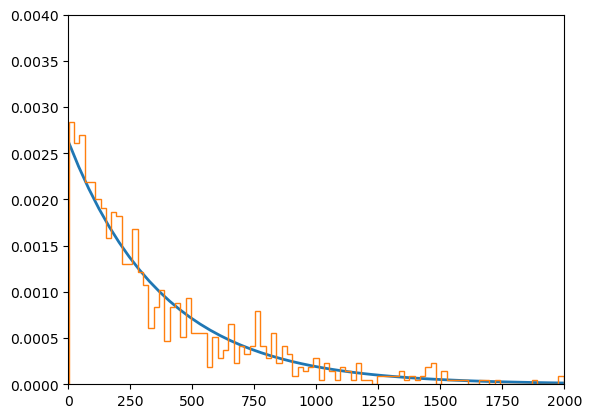

In [6]:
#Probability distribution
def pdf(t):
    return (2**((-t) / tau)) * (np.log(2) / tau)

#Inverse cumulative distribution
def icdf(z):
    return (-tau) * np.log2(1 - z)

t_max = 2000 #Chosen arbitrarily
t = np.linspace(0, t_max)

#Random generation of numbers
u = np.random.random(1000)

plt.plot(t, pdf(t), linewidth = 2)
plt.hist(icdf(u), histtype = 'step', bins = 150, density = True)   #Bins chosen arbitrarily
plt.axis([0, t_max, 0, 0.004])
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84